In [1]:
# Check Python Version
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


# Task 1: Overview

# Task 2: WebCrawler

In [1]:
# Define base URL
URL = 'https://www.fda.gov/inspections-compliance-enforcement-and-criminal-investigations/compliance-actions-and-activities/warning-letters'

In [2]:
# Beautiful Soup Function
def get_table(html):
    #response = requests.get(url)
    #html_content = response.text

    soup = BeautifulSoup(html)

    # Find the table by ID
    table = soup.find('table', {'id': 'datatable'})

    if table:
        # Create an empty list to store data
        data = []

        # Iterate through rows
        for row in table.find_all('tr'):
            # Create an empty dictionary for each row
            row_data = {}

            # Extract text from cells
            columns = row.find_all(['td', 'th'])
            for i, column in enumerate(columns):
                # Find links within each cell
                links = column.find_all('a', href=True)
                for link in links:
                    # Add data to the dictionary
                    row_data[f'Text_{i}'] = link.text.strip()
                    row_data[f'Href_{i}'] = link['href']
                # If no links, add the text content of the cell
                if not links:
                    row_data[f'Text_{i}'] = column.text.strip()
                    row_data[f'Href_{i}'] = None

            # Append the dictionary to the list
            data.append(row_data)

        # Create a DataFrame from the list of dictionaries
        df = pd.DataFrame(data)
        df.columns = df.iloc[0]
        df = df[1:]
        return df

In [29]:
# Selenium 4
#Libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd

#Initialise driver properties
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver.get(URL)

#Change dropdown from 10 entries per page to 100, this will reduce the number of loops required
entries = driver.find_element("name", "datatable_length")
dropdown = Select(entries)
dropdown.select_by_value("100")

# Wait before doing anything else
time.sleep(2)

# Get the maximum number of pages to limit the number of cycles in the data extract loop
x = driver.find_element(By.XPATH, '//*[@id="datatable_paginate"]/ul/li[9]/a')
total_pages = int(x.text)
#print(total_pages)
time.sleep(2)

#Click on Issue Date twice on webpage to order by issue date descending before downloading the data
issue_date_path = f'/html/body/div[2]/div[1]/div/main/article/div/section/div/div/div[2]/div[2]/div[2]/div/table/thead/tr/th[2]'
issue_date = driver.find_element(By.XPATH, issue_date_path)
issue_date.click()
time.sleep(2)
issue_date.click()

#Wait before trying to download the data
time.sleep(2)

#initialise empty dataframe to store data
df = pd.DataFrame()

#extract data from tables on each page (1-number of pages). Store in empty dataframe
for i in range (1, total_pages+1, 1):
    #Extract data from table on page
    df1 = get_table(driver.page_source)
    df = pd.concat([df, df1])
    # Select the "next page button"
    #'Next Page Button' XPATH
    xpath_expression = f'/html/body/div[2]/div[1]/div/main/article/div/section/div/div/div[2]/div[2]/div[3]/div[2]/div/ul/li[10]/a'
    element = driver.find_element(By.XPATH, xpath_expression)
    #Click the element
    element.click()
    #Wait before trying again
    time.sleep(2)
    ##print(i)
    
#close driver
driver.quit()

##print("Number of rows:", df.shape[0])
##print("Number of columns:", df.shape[1])

35


In [30]:
columns = ['Posted Date', 'NA1', 'Letter Issue Date', 'NA2', 'Company Name', 'Letter Link', 'Issuing Office', 'NA3', 'Subject',
           'NA4', 'Response Letter', 'NA5', 'Closeout Letter', 'NA6', 'Excerpt', 'NA7']
df.columns = columns
df.to_csv("Scraped_Data.csv", index=False)

In [165]:
#FDA blocked my BeautifulSoup code :(
import pandas as pd
from bs4 import BeautifulSoup
import requests
url = 'https://fda.gov/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/dr-bernes-whole-health-products-665456-11222023'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.text)













FDA Error















Skip to main content
Skip to FDA Search
Skip to in this section menu
Skip to footer links








An official website of the United States government
Here's how you know  





The .gov means it's official.Federal government websites often end in .gov or .mil. Before sharing sensitive information, make sure you're on a federal government site.





The site is secure. The https:// ensures that you are connecting to the official website and that any information you provide is encrypted and transmitted securely.









U.S. Food and Drug Administration





 
Search


 
Menu






Search FDA


Submit search









Featured

Contact FDA
FDA Guidance Documents
Recalls, Market Withdrawals and Safety Alerts
Press Announcements
Warning Letters
Advisory Committees
En EspaÃ±ol





Products

Food
Drugs
Medical Devices
Radiation-Emitting Products
Vaccines, Blood, and Biologics
Animal and Veterinary
Cosmetics
Tobacco Products



Topics

About FDA
Combinatio

In [9]:
#FDA didn't block Selenium :)
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd

#import data
data = pd.read_csv("Scraped_Data.csv")
data = data.drop(['NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6', 'NA7'], axis=1)

#get list of links
link_list = data['Letter Link'].tolist()
#print(link_list)

#Initialise Driver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

#Initialise empty dataframe
df = pd.DataFrame(columns=['Letter Link', 'Document'])

#
for link in link_list:
    driver.get('https://fda.gov'+link)
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    #print(soup.title.text)
    #print(soup.text)
    new_row = {'Letter Link': [link],
               'Document': [soup.text]}
    df1 = pd.DataFrame.from_dict(new_row)
    df = pd.concat([df, df1])


df.to_csv("test.csv", index=False, columns=['Letter Link', 'Document'], encoding='utf-8-sig')

#
#driver.get('https:///inspections-compliance-enforcement-and-criminal-investigations/warning-letters/dr-bernes-whole-health-products-665456-11222023')


#row = {'URL': [xxx],
#       'Document': [text]}
#df = pd.DataFrame(row)
#df.to_csv("text_doc.csv", index=False)
driver.quit()

In [7]:
df = pd.read_csv("test.csv")
#display(df)

,Letter Link,Document
0,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
5,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
6,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
7,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
8,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
9,/inspections-compliance-enforcement-and-crimin...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [8]:
import pandas as pd
#load the initial dataset (did not name this very well)
df = pd.read_csv("Scraped_Data.csv")
#load the text data (also did not name this well)
text_df = pd.read_csv("test.csv")

df_final = pd.merge(df, text_df, on='Letter Link', how='left')
#display(df_final)
#drop unnecessary columns. Subject of this report is not focussed on Response and Closeout Letters, so drop these too
columns_to_keep = ['Posted Date', 'Letter Issue Date', 'Company Name', 'Letter Link', 'Issuing Office',
                   'Subject', 'Document']

df_final = df_final[columns_to_keep]
#display(df_final)

df_final.to_csv("MA5851_A3_Corpus_Scraped.csv", index=False)

# Task 3: Data Wrangling

In [69]:
import pandas as pd
#import the data
df = pd.read_csv("MA5851_A3_Corpus_Scraped.csv")
# Show the df with no data to see the row names
df.head(0)

,Posted Date,Letter Issue Date,Company Name,Letter Link,Issuing Office,Subject,Document


In [70]:
import pandas as pd
# Remove the last section of the document, where its just extra page information
end_of_letter = 'Was this helpful?YesNo'

for i in range(0, len(df), 1):
    x = str(df['Document'][i])
    y = x.split(end_of_letter)[0]
    df['Document'][i] = y

# Remove the first section of the document, where its just extra page information
beginning_of_letter = 'Recipient:\n'
for i in range(0, len(df), 1):
    x = str(df['Document'][i])
    y = x.split(beginning_of_letter)[1].strip()
    df['Document'][i] = beginning_of_letter + y

# Save the Corpus stripped of extraneous information
df.to_csv("MA5851_A3_Stripped_Corpus.csv", index=False)

In [62]:
# Load the Stripped Corpus and assess data is as expected
import pandas as pd
stripped = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")
stripped.head(1)

,Posted Date,Letter Issue Date,Company Name,Letter Link,Issuing Office,Subject,Document
0,11/28/2023,11/22/2023,Dr. Berne’s Whole Health Products,/inspections-compliance-enforcement-and-crimin...,Center for Drug Evaluation and Research | CDER,CGMP/Finished Pharmaceuticals/Adulterated/Unap...,Recipient:\nDr. Berne’s Whole Health Products\...


In [74]:
# Assess a random document, ensure it looks as expected
test_text = stripped.at[4, 'Document']
test_text = str(test_text)
print(test_text)

Recipient:
Recipient Name
Mr. Umang Vohra




Recipient Title
Managing Director and Global CEO


Cipla Limited
Cipla House, Peninsula Business Park Mumbai
Ganpatrao Kadam Marg
Lower Parel, Mumbai 400013
Maharashtra
India

 Umang.Vohra@cipla.com




Issuing Office:
Center for Drug Evaluation and Research | CDER
United States




Warning Letter 320-24-11
November 17, 2023
Dear Mr. Vohra:
The U.S. Food and Drug Administration (FDA) inspected your drug manufacturing facility, Cipla Limited, FEI 3008581988, at Plot No. 9 & 10, Pharma Zone Phase II, Sector III, Indore Special Economic Zone, Pithampur, District Dhar, Madhya Pradesh 454775, India, from February 6 to February 17, 2023.
This warning letter summarizes significant violations of Current Good Manufacturing Practice (CGMP) regulations for finished pharmaceuticals. See Title 21 Code of Federal Regulations (CFR), parts 210 and 211 (21 CFR parts 210 and 211).
Because your methods, facilities, or controls for manufacturing, processing, p

In [3]:
# Get random sample of texts to label (training)
import pandas as pd
import random
# Generate a random sample of 100 to label. Don't want to use ones that are in order
# due to possiblity of new sections of code, changing focus on code sections etc.
# explain more in word document.
stripped = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")
training_df = stripped.sample(n=100, random_state=0)
#display(training_df['Letter Issue Date'])

In [20]:
# Label the data
import pandas as pd
# Print each document and manually label it
document_num = 0
for index, row in training_df.iterrows():
    document_num += 1
    print(f"----------------------------------Document # {document_num} (Document = {index}):------------------------------\n\n\n{row['Document']}")
    
    # Use a set to keep track of unique violations, likely that the same section of code will
    # be referenced multiple times
    unique_violations = set()

    while True:
        violation = input("Code Violation (press Enter without typing to finish): ")
        if violation == 'quit':
            break
        if not violation:
            break
        unique_violations.add(violation)

    # Update the 'Violations' column with the unique violations
    training_df.at[index, 'Violations'] = list(unique_violations)  # Wrap violations in a list
    
    
    if violation == 'quit':
        break

    print(f"Listed Violations for {row['Company Name']} on {row['Letter Issue Date']}: {list(unique_violations)} \n \n \n")

print("Finished collecting violations.")

----------------------------------Document # 1 (Document = 856):------------------------------


Recipient:
Recipient Name
Elaine (Xaio) Song




Recipient Title
Owner


North30 LLC
15552 Lake Hills Blvd # F-5
Bellevue, WA 98007-5928
United States




Issuing Office:
Division of West Coast Imports
United States




June 24, 2022
WARNING LETTER
Re: CMS # 633737
Dear Ms. Song:
On March 14 through April 8, 2022, the Food and Drug Administration (FDA) conducted a Foreign Supplier Verification Program (FSVP) inspection of North30 LLC, located at 15552 Lake Hills Blvd # F-5 Bellevue, WA 98007-5928. We also conducted an inspection April 16 through May 7, 2020. These inspections were conducted to determine compliance with the requirements of section 805 of the Federal Food, Drug, and Cosmetic Act (FD&C Act) (21 U.S.C. 384a) and the implementing FSVP regulation in 21 CFR part 1, subpart L.
The FSVP regulation requires that importers perform certain risk-based activities to verify that human and

Code Violation (press Enter without typing to finish): section 201(h) of the Federal Food, Drug, and Cosmetic Act 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 321(h)
Code Violation (press Enter without typing to finish): section 501(f)(1)(B) of the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 351(f)(1)(B)
Code Violation (press Enter without typing to finish): section 515(a) of the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360e(a)
Code Violation (press Enter without typing to finish): section 520(g) of the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360j(g)
Code Violation (press Enter without typing to finish): section 502(o) the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 352(o)
Code Violation (press Enter without typing to finish): section 510(k) of the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360(k)
Code Violation (press Ent

Code Violation (press Enter without typing to finish): section 201(g)(1)(B) of the Federal Food, Drug, and Cosmetic Act
Code Violation (press Enter without typing to finish): 21 U.S.C. § 321(g)(1)(B)
Code Violation (press Enter without typing to finish): section 201(p) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(p)].
Code Violation (press Enter without typing to finish): sections 301(d) and 505(a) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. 331(d), 355(a)].
Code Violation (press Enter without typing to finish): section 502(f)(1) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. 352(f)(1)]
Code Violation (press Enter without typing to finish): (21 CFR 201.5)
Code Violation (press Enter without typing to finish): section 503(b)(1)(A) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. 353(b)(1)(A)]
Code Violation (press Enter without typing to finish): section 502(f

Code Violation (press Enter without typing to finish): section 201(h) of the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 321(h),
Code Violation (press Enter without typing to finish): section 501(f)(1)(B) of the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 351(f)(1)(B),
Code Violation (press Enter without typing to finish): section 515(a) of the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360e(a),
Code Violation (press Enter without typing to finish): section 520(g) of the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360j(g)
Code Violation (press Enter without typing to finish): section 502(o) the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 352(o),
Code Violation (press Enter without typing to finish): section 510(k) of the Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360(k).
Code Violation (press Enter without typing to fi

Code Violation (press Enter without typing to finish): 21 U.S.C. 352(a) & (n); 321(n), 331(a)
Code Violation (press Enter without typing to finish): 21 CFR 202.1(e)(5)
Code Violation (press Enter without typing to finish): 21 U.S.C. 352(a) & (n); 321(n), 331(a).
Code Violation (press Enter without typing to finish): 21 CFR 202.1(e)(5).
Code Violation (press Enter without typing to finish): 
Listed Violations for Vanda Pharmaceuticals on 10/22/2018: ['21 CFR 202.1(e)(5)', '21 U.S.C. 352(a) & (n); 321(n), 331(a)', '21 U.S.C. 352(a) & (n); 321(n), 331(a).', '21 CFR 202.1(e)(5).'] 
 
 

----------------------------------Document # 6 (Document = 1390):------------------------------


Recipient:
Recipient Name
Mr.Vincent Miletti




Recipient Title
General Counsel


Supplement Science Corp. d/b/a Condemned Labz
2139 East 3rd Street
Brooklyn, NY 11223
United States




Issuing Office:
Office of Human and Animal Food Operations East – Division 1
United States




WARNING LETTER
CMS# 613165
Sep

Code Violation (press Enter without typing to finish): [21 U.S.C. 321(g)(1)(B)] 
Code Violation (press Enter without typing to finish): [21 U.S.C. 321(p)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. 331(d), 355(a)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 352(f)(1)]
Code Violation (press Enter without typing to finish): (21 CFR 201.5).
Code Violation (press Enter without typing to finish): [21 U.S.C. 353(b)(1)(A)], 
Code Violation (press Enter without typing to finish): [21 U.S.C. 352(f)(1)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 331(a)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 321(ff)(1)]
Code Violation (press Enter without typing to finish): [21 U.S.C. 350b(d)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 350b(a)],
Code Violation (press Enter without typing to finish): [21 U.S.C. 342(f)]
Code Violation (press Enter without typing to finish): [21 U.S.C. 350b(a)

Code Violation (press Enter without typing to finish): [21 U.S.C. § 321 (g)(1)(B)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(v)],
Code Violation (press Enter without typing to finish): [21 U.S.C. § 360b(a)],
Code Violation (press Enter without typing to finish): 
Listed Violations for Guardian Pet Products Inc on 11/08/2018: ['[21 U.S.C. § 360b(a)],', '[21 U.S.C. § 321 (g)(1)(B)]. ', '[21 U.S.C. § 351(a)(5)]. ', '[21 U.S.C. § 321(v)],', '[21 U.S.C. § 321(g)(1)(B)].  '] 
 
 

----------------------------------Document # 8 (Document = 3098):------------------------------


Recipient:
Recipient Name
Jeffrey Friedman




Recipient Title
Owner


Vital Rx, Inc. dba Atlantic Pharmacy and Compounding 
Vital Rx, Inc. dba Atlantic Pharmacy and Compounding 
1000 E. Atlantic Blvd., Suite 110
Pompano Beach, FL 33060-7479
United States




Issuing Office:
Dallas District Office
United States




September 26, 2018

 
CMS # 539399

 
WARNING LETTER




VIA UPS OVERNIGH

Code Violation (press Enter without typing to finish): [21 U.S.C. § 351(a)(2)(A)].  
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(k)]
Code Violation (press Enter without typing to finish): 
Listed Violations for Vital Rx, Inc. dba Atlantic Pharmacy and Compounding on 09/26/2018: ['[21 U.S.C. § 351(a)(2)(A)].  ', '[21 U.S.C. § 331(k)]'] 
 
 

----------------------------------Document # 9 (Document = 2190):------------------------------


Recipient:
Recipient Name
Thomas C. Lines


FRS International, LLC
75 Arlington St., Ste 500
Boston, MA 02116
United States

 customerservice@frs.com




Issuing Office:
Center for Food Safety and Applied Nutrition (CFSAN)
United States

 Federal Trade Commission





WARNING LETTER
Date:               June 15, 2020
RE:                  Unapproved and Misbranded Products Related to Coronavirus Disease 2019 (COVID-19)
This is to advise you that the United States Food and Drug Administration (FDA) and the Federal Trade Commissi

Code Violation (press Enter without typing to finish): 15 U.S.C. 41 et seq
Code Violation (press Enter without typing to finish): 21 U.S.C. § 355(a).
Code Violation (press Enter without typing to finish): 21 U.S.C. § 352.
Code Violation (press Enter without typing to finish): 21 U.S.C. § 331(a) and (d).
Code Violation (press Enter without typing to finish): 
Listed Violations for FRS International, LLC on 06/15/2020: ['21 U.S.C. § 352.', '21 U.S.C. § 331(a) and (d).', '15 U.S.C. 41 et seq', '21 U.S.C. § 355(a).'] 
 
 

----------------------------------Document # 10 (Document = 1739):------------------------------


Recipient:
Recipient Name
Matthew Guidry


Vapor Springs LLC
1109 Florida Avenue SW, Ste B
Denham Springs, LA 70726
United States

 admin@vapor-springs.com
 support@vapor-springs.com




Issuing Office:
Center for Tobacco Products
United States




WARNING LETTER
Dear Matthew Guidry:
The Center for Tobacco Products of the U.S. Food and Drug Administration (FDA) recently rev

Code Violation (press Enter without typing to finish): 21 C.F.R. Parts 1140, 1141, and 1143
Code Violation (press Enter without typing to finish): section 303(f)(9)(B)(i)(II) of the FD&C Act. 
Code Violation (press Enter without typing to finish): 
Listed Violations for Vapor Springs LLC on 03/12/2021: ['(21 U.S.C. § 387e(j)(1)(A)(ii)) ', '21 C.F.R. Parts 1140, 1141, and 1143', '21 C.F.R. § 1100.1.  ', '(21 U.S.C. § 387j(c)(1)(A)(i)) ', '(21 U.S.C. § 321(rr)), ', '(21 U.S.C. § 387e(j)) ', '21 U.S.C. § 301 et seq., ', 'section 303(f)(9)(B)(i)(II) of the FD&C Act. ', '(21 U.S.C. § 387a(b))', '21 U.S.C. § 387j(a)).  ', '(21 U.S.C. § 387e(j)(3)).'] 
 
 

----------------------------------Document # 11 (Document = 3223):------------------------------


Recipient:
Recipient Name
Mihails Silovs


SIA "Piejura"
Nicas pagasts, Nicas novads
Avoti Liepajas Aprinkis, LV-3473
Latvia




Issuing Office:
Center for Food Safety and Applied Nutrition
United States




 
 
 


 


 

 

5001 Campus Driv

Code Violation (press Enter without typing to finish): 21CFR123.6(g), 
Code Violation (press Enter without typing to finish): 21 CFR 123.6(g) 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 342(a)(4)). 
Code Violation (press Enter without typing to finish): 21 CFR 123.6(c)(3). 
Code Violation (press Enter without typing to finish): 21CFR123.3(c) 
Code Violation (press Enter without typing to finish): 21 CFR 123.6(c)(4). 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 381(a)),
Code Violation (press Enter without typing to finish): 
Listed Violations for SIA "Piejura" on 07/03/2018: ['21CFR123.3(c) ', '21 CFR 123.6(c)(3). ', '(21 U.S.C. § 342(a)(4)). ', '21 CFR 123.6(g) ', '21 CFR 123.6(c)(4). ', '(21 U.S.C. § 381(a)),', '21CFR123.6(g), '] 
 
 

----------------------------------Document # 12 (Document = 880):------------------------------


Recipient:
Recipient Name
Jasmine Salazar




Recipient Title
CEO/Owner


SDJJ Distributors
2434 Southport

Code Violation (press Enter without typing to finish): 21 U.S.C. § 355(a). 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 352. 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 331(a) and (d).
Code Violation (press Enter without typing to finish): 
Listed Violations for Plum Dragon Herbs, Inc. on 05/08/2020: ['21 U.S.C. § 352. ', '21 U.S.C. § 331(a) and (d).', '21 U.S.C. § 355(a). '] 
 
 

----------------------------------Document # 14 (Document = 3135):------------------------------


Recipient:
E Juice Forty
51 Peters Canyon Rd
Irvine, CA 92606
United States




Issuing Office:
Center for Tobacco Products
United States




 
 



 
 

Center for Tobacco Products
10903 New Hampshire Avenue
Silver Spring, MD 20993 

 
VIA UPS and Electronic Mail
 
SEP 12 2018
                        
E Juice Forty
51 Peters Canyon Rd
Irvine, CA 92606
info@ejuiceforty.com
 
 
WARNING LETTER
 
Dear E Juice Forty:
 
This is to advise you that the Center for Tobacco 

Code Violation (press Enter without typing to finish): [21 U.S.C. 321(g)(1)(B)] 
Code Violation (press Enter without typing to finish): [21 U.S.C. 342(a)(2)(C)(i)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 321(p)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. 331(d), 355(a)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. 352(f)(1)] 
Code Violation (press Enter without typing to finish): (21 CFR 201.5). 
Code Violation (press Enter without typing to finish): [21 U.S.C. 353(b)(1)(A)], 
Code Violation (press Enter without typing to finish): [21 U.S.C. 352(f)(1)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 331(a)].
Code Violation (press Enter without typing to finish): [21 U.S.C. 342(a)(2)(C)(i)] 
Code Violation (press Enter without typing to finish): [21 U.S.C. 348(a)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. 342(a)(C)(i)].
Code Violation (press Enter without typing to fin

Code Violation (press Enter without typing to finish): 21 U.S.C. § 321(h).
Code Violation (press Enter without typing to finish): 21 U.S.C. § 351(f)(1)(B), 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360e(a), 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360j(g). 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 352(o), 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360(k). 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 331(a). 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 331(k), 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 360bbb-3, 
Code Violation (press Enter without typing to finish): 42 U.S.C. § 263a,
Code Violation (press Enter without typing to finish): 
Listed Violations for AkivaMed Inc. on 07/23/2020: ['21 U.S.C. § 321(h).', '21 U.S.C. § 360bbb-3, ', '21 U.S.C. § 360(k). ', '21 U.S.C. § 360j(g). ', '42 U.S.C. § 263a,', '21 U.S

Code Violation (press Enter without typing to finish): (21 U.S.C. 384a) 
Code Violation (press Enter without typing to finish): 21 CFR part 1, subpart L.
Code Violation (press Enter without typing to finish): 21 CFR part 1.502(a). 
Code Violation (press Enter without typing to finish): 21 CFR 1.502(a).
Code Violation (press Enter without typing to finish): section 805 of the FD&C Act
Code Violation (press Enter without typing to finish): 21 CFR part 1, subpart L.
Code Violation (press Enter without typing to finish): (21 U.S.C. 381(a)(3))
Code Violation (press Enter without typing to finish): (21 U.S.C. 331(zz)).
Code Violation (press Enter without typing to finish): 
Listed Violations for Fres Co, LLC on 04/18/2022: ['(21 U.S.C. 384a) ', '21 CFR 1.502(a).', '21 CFR part 1.502(a). ', 'section 805 of the FD&C Act', '(21 U.S.C. 331(zz)).', '(21 U.S.C. 381(a)(3))', '21 CFR part 1, subpart L.'] 
 
 

----------------------------------Document # 19 (Document = 485):-------------------------

Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b))
Code Violation (press Enter without typing to finish): 21 C.F.R. § 1100.1.
Code Violation (press Enter without typing to finish): section 910(a) of the FD&C Act;
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a) 
Code Violation (press Enter without typing to finish): section 910(c)(1)(A)(i) of the FD&C Act
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i)) 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)) 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii)) 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3)).
Code Violation (press Enter without typing to finish): 21 U.S.C. § 301 et seq., 
Code Violation (press Enter without typing to finish): 21 C.F.R. Parts 1140, 1141, and 1143,
Code

Code Violation (press Enter without typing to finish): section 201(g)(1)(B) of the Federal Food, Drug, and Cosmetic Act (the Act)
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(g)(1)(B)]
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(p)].
Code Violation (press Enter without typing to finish): [21 U.S.C. §§ 331(d), 355(a)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. § 352(f)(1)] 
Code Violation (press Enter without typing to finish): (21 C.F.R. § 201.5). 
Code Violation (press Enter without typing to finish): [21 U.S.C. § 353(b)(1)(A)], 
Code Violation (press Enter without typing to finish): [21 U.S.C. § 352(f)(1)]. 
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(a)].
Code Violation (press Enter without typing to finish): 
Listed Violations for Gold Crown Natural Products on 02/05/2019: ['[21 U.S.C. § 321(p)].', '(21 C.F.R. § 201.5). ', '[21 U.S.C. § 352(f)(1)] ', '[21 U.S.C. § 353(b)(1)(A

Code Violation (press Enter without typing to finish): (21 CFR 211 .22, 211.165, 211.192, and 211.194). 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 342(g)(1)] 
Code Violation (press Enter without typing to finish): 21 CFR 111.75(h)(1). 
Code Violation (press Enter without typing to finish): 21 CFR 111.75(d), 
Code Violation (press Enter without typing to finish): 21 CFR 111.113(a)(1).
Code Violation (press Enter without typing to finish): [21 U.S.C. § 343]
Code Violation (press Enter without typing to finish): (21 U.S.C. § 343(q)(1)(A)] 
Code Violation (press Enter without typing to finish): 21 CFR 111.110(c). 
Code Violation (press Enter without typing to finish): (21 CFR 101.36(c)].
Code Violation (press Enter without typing to finish): (21 CFR parts 210 and 211).
Code Violation (press Enter without typing to finish): 21 U.S.C. 351(a)(2)(B).
Code Violation (press Enter without typing to finish): (21 CFR 211.194(a)).
Code Violation (press Enter without typing 

Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): section 901(b) of the FD&C Act
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b)) and 21 C.F.R. § 1100.1.
Code Violation (press Enter without typing to finish): (section 910(a) of the FD&C Act;
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j))
Code Violation (press Enter without typing to finish): (section 910(a)(2)(A) of the FD&C Act)
Code Violation (press Enter without typing to finish): section 905(j)(1)(A)(ii) of the FD&C Act
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii)) 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3)).
Code Violation (press Enter without typing to fi

Code Violation (press Enter without typing to finish): (21 U.S.C. § 331(p)).
Code Violation (press Enter without typing to finish): section 303(f)(9)(B)(i)(II) of the FD&C Act.
Code Violation (press Enter without typing to finish): (21 U.S.C. § 331(k)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(6))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387b(6)(A))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a
Code Violation (press Enter without typing to finish): 21 C.F.R. § 1100.1.
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b))
Code Violation (press Enter w

Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b))
Code Violation (press Enter without typing to finish): 21 C.F.R. § 1100.1. 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): (21 U.S.C. §387e(j))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387b(6)(A)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(6))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 331(k)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 331(p)).
Code Violation (press Enter without typing to fi

Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(1))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(7)(A))
Code Violation (press Enter without typing to finish): (section 903(a)(1)),
Code Violation (press Enter without typing to finish): (section 903(a)(7)(A)).
Code Violation (press Enter without typing to finish): 
Listed Violations for 120ml.co, LLC on 09/26/2018: ['(21 U.S.C. § 387c(a)(1))', '(section 903(a)(7)(A)).', '(section 903(a)(1)),', '(21 U.S.C. § 387c(a)(7)(A))', '(21 U.S.C. § 387a(b)).', '(21 U.S.C. § 321(rr)),'] 
 
 

----------------------------------Document # 26 (Document = 295):------------------------------


Recipient:
Recipient Name
Fahed AL Hassan and Nabeel Mansour


F & N Trading 1 Inc. d/b/a/ Puffholic
5110 Shadow Lake Dr
Bakersfield, CA 93313-4368
Unit

Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b))
Code Violation (press Enter without typing to finish): 21 C.F.R. § 1100.1, 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)) 
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a)). 
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3)).
Code Violation (press Enter without typing to finish): section 910(c)(1)(A)(i) of the FD&C Act 
Code Violation (press Enter without typing to finish): 21 C.F.R. Parts 1140, 1141, and 1143,
Code Violation (press Enter without typing to finish): 
Listed Violations for F & N Trading 1

Code Violation (press Enter without typing to finish): 21 U.S.C. 352(n); 321(n); 331(a).
Code Violation (press Enter without typing to finish): 21 CFR 202.1(e)(3)(ii) and (iii
Code Violation (press Enter without typing to finish): 21 U.S.C. 352(n); 321(n); 331(a).
Code Violation (press Enter without typing to finish): 21 CFR 202.1(e)(3)(ii) and (iii);
Code Violation (press Enter without typing to finish): 
Listed Violations for Sprout Pharmaceuticals, Inc on 08/31/2020: ['21 U.S.C. 352(n); 321(n); 331(a).', '21 CFR 202.1(e)(3)(ii) and (iii', '21 CFR 202.1(e)(3)(ii) and (iii);'] 
 
 

----------------------------------Document # 28 (Document = 489):------------------------------


Recipient:
Recipient Name
Mr. Roger L. Flores




Recipient Title
Owner and Manager


Distributor RFR, LLC
3580 NW 85th Ct Apt 150
Doral, FL 33122-1986
United States

 rfr.distributor@gmail.com




Issuing Office:
Center for Drug Evaluation and Research | CDER
United States




WARNING LETTER
January 9, 2023
R

Code Violation (press Enter without typing to finish): 21 U.S.C. 355(a) and 331(d).
Code Violation (press Enter without typing to finish): 21 U.S.C. 352,
Code Violation (press Enter without typing to finish): 21 U.S.C. 331(a). 
Code Violation (press Enter without typing to finish): section 201(ff)(3)(B)(i) of the FD&C Act,
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(ff)(3)(B)(i),
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(ff)(3)(B)(i).
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(g)(1)
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(p).
Code Violation (press Enter without typing to finish): 21 U.S.C. 331(d) and 355(a).
Code Violation (press Enter without typing to finish): 21 U.S.C. 355(a) and 331(d).
Code Violation (press Enter without typing to finish): 21 U.S.C. 352(f)(1),
Code Violation (press Enter without typing to finish): 21 C.F.R. 201.5.
Code Violation (press Enter without typing to

Code Violation (press Enter without typing to finish): 21 U.S.C. 355(a) and 331(d).
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(g)(1),
Code Violation (press Enter without typing to finish): 21 U.S.C. 355(a).
Code Violation (press Enter without typing to finish): 15 U.S.C. §§ 41–57,
Code Violation (press Enter without typing to finish): 15 U.S.C. § 45d,
Code Violation (press Enter without typing to finish): 15 U.S.C. § 57b(b).
Code Violation (press Enter without typing to finish): 
Listed Violations for Kratom Exchange on 06/30/2022: ['15 U.S.C. § 57b(b).', '21 U.S.C. 321(g)(1),', '15 U.S.C. § 45d,', '15 U.S.C. §§ 41–57,', '21 U.S.C. 355(a) and 331(d).', '21 U.S.C. 355(a).'] 
 
 

----------------------------------Document # 30 (Document = 196):------------------------------


Recipient:
Recipient Name
Mr. Diego Velázquez




Recipient Title
Manager


Laavo Clean, S.A. de C.V.
Elías Flores Sur. No. 300
Apodaca Centro
66600 Ciudad Apodaca, N.L.
Mexico




Issuing

Code Violation (press Enter without typing to finish): section 201(rr) of the Federal Food, Drug, and Cosmetic Act
Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b)).
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3))
Code Violation (press Enter without typing to finish): section 910(c)(1)(A)(i) of the FD&C Act
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387b(6)(A)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(6))
Code Violation (press Enter without typing to finish): (21 U.S.C. 

Code Violation (press Enter without typing to finish): section 201(rr) of the Federal Food, Drug, and Cosmetic Act (FD&C Act)
Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr)),
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387a(b))
Code Violation (press Enter without typing to finish): 21 C.F.R. § 1100.1,
Code Violation (press Enter without typing to finish): (21 U.S.C. § 321(rr))
Code Violation (press Enter without typing to finish): 21 U.S.C. § 387j(a)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387j(c)(1)(A)(i))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(1)(A)(ii))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387e(j)(3))
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387b(6)(A)).
Code Violation (press Enter without typing to finish): (21 U.S.C. § 387c(a)(6))

Code Violation (press Enter without typing to finish): (21 CFR Part 111)
Code Violation (press Enter without typing to finish): [21 U.S.C. § 342(g)(1)]
Code Violation (press Enter without typing to finish): 21 CFR 111.70(e)
Code Violation (press Enter without typing to finish): 21 CFR 111.205(a)
Code Violation (press Enter without typing to finish): 21 CFR 111.210.
Code Violation (press Enter without typing to finish): 21 CFR 111.75(c)
Code Violation (press Enter without typing to finish): 21 CFR 111.75(h)(1)
Code Violation (press Enter without typing to finish): 21 CFR 111.77(a)
Code Violation (press Enter without typing to finish): 21 CFR 111.70
Code Violation (press Enter without typing to finish): 21 CFR 111.113(b)(2)
Code Violation (press Enter without typing to finish): 21 CFR 111.123(a)(5)
Code Violation (press Enter without typing to finish): 21 CFR 111.260(l)(3)
Code Violation (press Enter without typing to finish): [21 U.S.C. § 343(q)(5)(F)]
Code Violation (press Enter withou

Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(a)].
Code Violation (press Enter without typing to finish): [21 U.S.C. § 352(f)(1)].
Code Violation (press Enter without typing to finish): section 502(f)(1) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 353(b)(1)(A)],
Code Violation (press Enter without typing to finish): section 503(b)(1)(A) of the Act
Code Violation (press Enter without typing to finish): (21 CFR 201.5).
Code Violation (press Enter without typing to finish): [21 U.S.C. § 352(f)(1)]
Code Violation (press Enter without typing to finish): section 502(f)(1) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(d), 355(a)].
Code Violation (press Enter without typing to finish): sections 301(d) and 505(a) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(p
Code Violation (press Enter without typing to finish): section 201(p) of the Act
Code Violation (press 

Code Violation (press Enter without typing to finish): Title 21 Code of Federal Regulations (CFR), parts 210 and 211
Code Violation (press Enter without typing to finish): (21 CFR parts 210 and 211)
Code Violation (press Enter without typing to finish): section 501(a)(2)(B) of the Federal Food, Drug, and Cosmetic Act (FD&C Act)
Code Violation (press Enter without typing to finish): 21 U.S.C. 351(a)(2)(B).
Code Violation (press Enter without typing to finish): (21 CFR 211.84(d)(2)).
Code Violation (press Enter without typing to finish): (21 CFR 211.22).
Code Violation (press Enter without typing to finish): (21 CFR 211.100(a)).
Code Violation (press Enter without typing to finish): (21 CFR 211.166(a)).
Code Violation (press Enter without typing to finish): (21 CFR 211.22(d)).
Code Violation (press Enter without typing to finish): (21 CFR 211.67(b)).
Code Violation (press Enter without typing to finish): 21 CFR, parts 210 and 211
Code Violation (press Enter without typing to finish): 21 

Code Violation (press Enter without typing to finish): sections 505(a) and 301(d) of the Federal Food, Drug, and Cosmetic Act (the FD&C Act)
Code Violation (press Enter without typing to finish): 21 U.S.C. 355(a) and 331(d)
Code Violation (press Enter without typing to finish): section 502(f)(1) of the FD&C Act
Code Violation (press Enter without typing to finish): 21 U.S.C. 352(f)(1)
Code Violation (press Enter without typing to finish): 21 U.S.C. 360b(a),
Code Violation (press Enter without typing to finish): 21 U.S.C. 351(a)(5).
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(g)(1),
Code Violation (press Enter without typing to finish): 21 U.S.C. 321(p).
Code Violation (press Enter without typing to finish): 21 U.S.C. 331(d) and 355(a)
Code Violation (press Enter without typing to finish): 21 U.S.C. 352(f)(1),
Code Violation (press Enter without typing to finish): 21 CFR 201.5.)
Code Violation (press Enter without typing to finish): 21 CFR 201.100(c)(2) and 201.

Code Violation (press Enter without typing to finish): [21 U.S.C. § 353a]
Code Violation (press Enter without typing to finish): [21 U.S.C. §§ 351(a)(2)(B), 352(f)(1) and 355(a)]
Code Violation (press Enter without typing to finish): section 501(a)(2)(A) of the FDCA
Code Violation (press Enter without typing to finish): Title 21, Code of Federal Regulations (CFR), parts 210 and 211
Code Violation (press Enter without typing to finish): (21 CFR 211.113(b))
Code Violation (press Enter without typing to finish): (21 CFR 211.42(c)(10)(v))
Code Violation (press Enter without typing to finish): (21 CFR 211.42(c)(10)(iv))
Code Violation (press Enter without typing to finish): (21 CFR 211.167(a))
Code Violation (press Enter without typing to finish): (21 CFR 211.166(a))
Code Violation (press Enter without typing to finish): (21 CFR 211.68(a))
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(a)]
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(k)]
C

Code Violation (press Enter without typing to finish): sections 301(a), 301(d), and 505(a) of the Federal Food, Drug, and Cosmetic Act
Code Violation (press Enter without typing to finish): [21 U.S.C. §§ 331(a), 331(d), and 355(a)]
Code Violation (press Enter without typing to finish): section 201(g) of the FD&C Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(g)]
Code Violation (press Enter without typing to finish): section 201(p) of the FD&C Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(p)]
Code Violation (press Enter without typing to finish): section 505(a) of the FD&C Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 355(a)]
Code Violation (press Enter without typing to finish): section 505 of the FD&C Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 331(d)]
Code Violation (press Enter without typing to finish): 505(a) of the FD&C Act
Code Violation (press Enter without typing to

Code Violation (press Enter without typing to finish): section 201(g)(1)(B) of the Federal Food, Drug, and Cosmetic Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(g)(1)(B)]
Code Violation (press Enter without typing to finish): [21 C.F.R. § 201.128]
Code Violation (press Enter without typing to finish): 21 CFR § 201.128
Code Violation (press Enter without typing to finish): section 201(p) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. § 321(p)]
Code Violation (press Enter without typing to finish): sections 301(d) and 505(a) of the Act
Code Violation (press Enter without typing to finish): [21 U.S.C. §§ 331(d), 355(a)]
Code Violation (press Enter without typing to finish): sections 505(a) and 301(d) of the Act
Code Violation (press Enter without typing to finish): 21 U.S.C. §§ 355(a), 331(d)
Code Violation (press Enter without typing to finish): section 502(f)(1) of the Act [
Code Violation (press Enter without typing to finish

Code Violation (press Enter without typing to finish): section 805 of the Federal Food, Drug, and Cosmetic Act (FD&C Act)
Code Violation (press Enter without typing to finish): (21 U.S.C. 384a)
Code Violation (press Enter without typing to finish): 21 CFR part 1, subpart L
Code Violation (press Enter without typing to finish): 21 CFR part 1, subpart L
Code Violation (press Enter without typing to finish): section 805 of the FD&C Act
Code Violation (press Enter without typing to finish): section 805 of the FD&C Act
Code Violation (press Enter without typing to finish): 21 CFR 1.502(a)
Code Violation (press Enter without typing to finish): section 805 of the FD&C Act
Code Violation (press Enter without typing to finish): 21 CFR part 1, subpart L
Code Violation (press Enter without typing to finish): section 801(a)(3) of the FD&C Act
Code Violation (press Enter without typing to finish): (21 U.S.C. 381(a)(3))
Code Violation (press Enter without typing to finish): section 805
Code Violatio

Code Violation (press Enter without typing to finish): quit
Finished collecting violations.


### Gave up  after 40 documents (far too time consuming, limitation of model to be trained)

In [21]:
display(training_df['Violations'])
training_df.to_csv("Labelled_Data.csv")

856     [21 CFR part 1, subpart L, 801(a)(3) of the FD...
2357    [section 501(f)(1)(B) of the Act, 21 CFR 884.6...
1341    [[21 U.S.C. 353(b)(1)(A)], [21 U.S.C. § 321(p)...
1499    [section 502(o) the Act,, 510(k) of the Act,, ...
3062    [21 CFR 202.1(e)(5), 21 U.S.C. 352(a) & (n); 3...
                              ...                        
1794                                                  NaN
1964                                                  NaN
463                                                   NaN
1332                                                  NaN
1818                                                  NaN
Name: Violations, Length: 100, dtype: object

In [3]:
import pandas as pd
training_df = pd.read_csv("Labelled_Data.csv")
training_df.head(1)

,Unnamed: 0,Posted Date,Letter Issue Date,Company Name,Letter Link,Issuing Office,Subject,Document,Violations
0,856,07/19/2022,06/24/2022,North30 LLC,/inspections-compliance-enforcement-and-crimin...,Division of West Coast Imports,Foreign Supplier Verification Program (FSVP),Recipient:\nRecipient Name\nElaine (Xaio) Song...,"['21 CFR part 1, subpart L', '801(a)(3) of the..."


In [56]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
corpus = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")

tok_corpus = [(doc.split()) for doc in corpus['Document']]

# Train Word2Vec model
model1 = Word2Vec(sentences=tok_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Document Embeddings test
# document_embeddings = [model.wv[doc] for doc in tok_corpus]
# Save the model for future use
model1.save("word2vec_model1.model")

In [58]:
# Load the Model
from gensim.models import Word2Vec
# model = normal tokenisation (do not use) 
model = Word2Vec.load("word2vec_model.model")
# model1 = tokenise based on space, this keeps the punctuation working properly
model1 = Word2Vec.load("word2vec_model1.model")
#document_embeddings = [model.wv[doc] for doc in tok_corpus]
#print(document_embeddings)

## Positive Samples

In [37]:
# Positive Samples
import pandas as pd
from ast import literal_eval

df = pd.read_csv("Labelled_Data.csv")
df['Violations'] = df['Violations'].apply(lambda x: [] if pd.isna(x) else literal_eval(x))
p_samples = df['Violations'].tolist()
# Check for list of lists
#print(p_samples[0:2])
#print('\n\n\n\n\n\n')
#Convert Flatten List of Lists
p_samples = [violation for sublist in df['Violations'] if isinstance(sublist, list) for violation in sublist]
# Check for flatten list
#print(p_samples[0:50])

[['21 CFR part 1, subpart L', '801(a)(3) of the FD&C Act', '(21 U.S.C. 384a)', 'section 805 of the Federal Food, Drug, and Cosmetic Act', 'section 805 of the FD&C Act.', 'section 805 of the FD&C Act', '21 CFR 1.502(a)', 'section 301(zz) of the FD&C Act', '(21 U.S.C. 331(zz)', '(21 U.S.C. 381(a)(3))', '21 CFR part 1, subpart L.'], ['section 501(f)(1)(B) of the Act', '21 CFR 884.6110', '21 U.S.C. § 352(a)(1),', 'section 502(o) the Act', '21 U.S.C. § 352(o)', '21 U.S.C. § 352(t)(2),', '21 U.S.C. § 360i,', 'section 201(h) of the Federal Food, Drug, and Cosmetic Act ', '21 CFR 1271.21.', 'section 510(k) of the Act', '1271.80', '21 CFR 801 subpart D', '21 CFR part 1271', '[21 CFR 801.109(c)]', '21 CFR 820.90.', '21 U.S.C. § 360(k)', '21 U.S.C. § 360e(a)', '[21 CFR 801.109(b)(1)]', 'section 502(a)(1),', '21 CFR 820.30(a).', '21 CFR 820.30(j).', 'section 502(a) of the Act', '21 CFR 1271.75', 'section 510(j),', '21 U.S.C. § 360j(g)', '21 CFR 820.198(a).', '21 U.S.C. § 321(h)', 'section 502(o) o

In [106]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np

samples_df = pd.DataFrame()

for violation in p_samples:
    xgram = violation
    Y = 1
    violation_tokens = violation.split()
    embedding_list = []
    #violation_tokens = word_tokenize(violation.lower())
    for i in violation_tokens:
        if i in model1.wv:
            embeddings = model1.wv[i]
            average_embedding = np.mean(embeddings, axis=0)
            embedding_list.append(average_embedding)
        #print(average_embedding)
    xgram_embedding = np.mean(embedding_list)
    new_row = pd.DataFrame({'Code': [xgram], 'Mean Rowwise Embedding': [xgram_embedding], 'Y': 1})
    samples_df = df = pd.concat([samples_df, new_row])
    #print(xgram_embedding)
    #print(violation_tokens)
print(samples_df.shape[0])
samples_df.head(10)
samples_df.to_csv("Positive_Samples.csv", index=False)

531


## Negative Samples

In [135]:
import pandas as pd
from nltk import ngrams
import random

corpus = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")
corpus['Tokens'] = corpus['Document'].apply(lambda x: x.split())
corpus['5-grams'] = corpus['Tokens'].apply(lambda x: list(ngrams(x, 5)))
all_5grams = [ngram for sublist in corpus['5-grams'].tolist() for ngram in sublist]

random.seed(5)
sample_size = 1000
negative_samples = random.sample(all_5grams, sample_size)
df = pd.DataFrame({'5gram': negative_samples})
df.to_csv("random_samples.csv", index=False)

#print(len(negative_samples))
#print(negative_samples)

In [137]:
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np
import ast

def convertTuple(tup):
        # initialize an empty string
    str = ''
    for item in tup:
        str = str + ' ' + item
    return str



negative_samples = pd.read_csv("random_samples.csv")
negative_samples.head(1)
negative_samples['5gram'] = negative_samples['5gram'].apply(ast.literal_eval)
negative_samples['Text'] = negative_samples['5gram'].apply(lambda x: ' '.join(x))
negative_samples.head(1)

samples_df = pd.DataFrame()

for index, row in negative_samples.iterrows():
    xgram = row['Text']
    Y = row['Y']
    violation_tokens = row['5gram']
    embedding_list = []
    for i in violation_tokens:
        if i in model1.wv:
            embeddings = model1.wv[i]
            average_embedding = np.mean(embeddings, axis=0)
            embedding_list.append(average_embedding)
        #print(average_embedding)
    xgram_embedding = np.mean(embedding_list)
    new_row = pd.DataFrame({'Code': [xgram], 'Mean Rowwise Embedding': [xgram_embedding], 'Y': [Y]})
    samples_df = pd.concat([samples_df, new_row])
    #print(xgram_embedding)
    #print(violation_tokens)
#print(samples_df.shape[0])
#samples_df.head(10)
samples_df.to_csv("Negative_Samples.csv", index=False)

In [139]:
import pandas as pd
# Combine positive and negative samples
n_df = pd.read_csv("Negative_Samples.csv")
p_df = pd.read_csv("Positive_Samples.csv")

samples = pd.concat([n_df, p_df])
samples.to_csv("Final_Samples.csv", index=False)

## EDA and Corpus Visualisation

In [219]:
# Load data (Stripped Corpus probably the best)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")

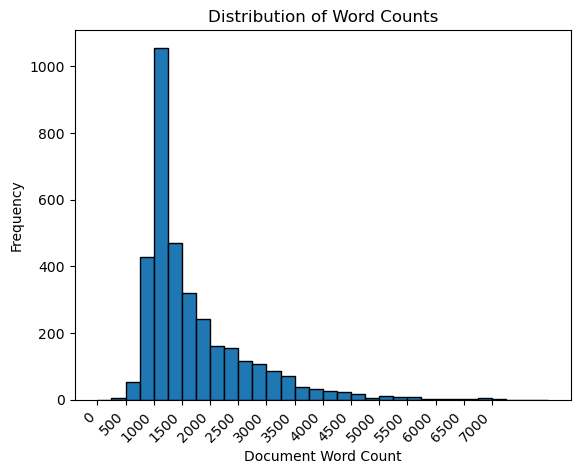

In [234]:
df['Word Count'] = df['Document'].apply(lambda x: len(x.split()))

bin_edges = list(range(0, max(df['Word Count']) + 1001, 250))
# Plotting the histogram
plt.hist(df['Word Count'], bins=bin_edges, edgecolor='black') 
plt.title('Distribution of Word Counts')
plt.xlabel('Document Word Count')
plt.ylabel('Frequency')
plt.xticks(range(0, max(df['Word Count']) + 251, 500), rotation=45, ha='right')
plt.show()

C:\Users\sbous\AppData\Local\Temp\ipykernel_10140\1988143005.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


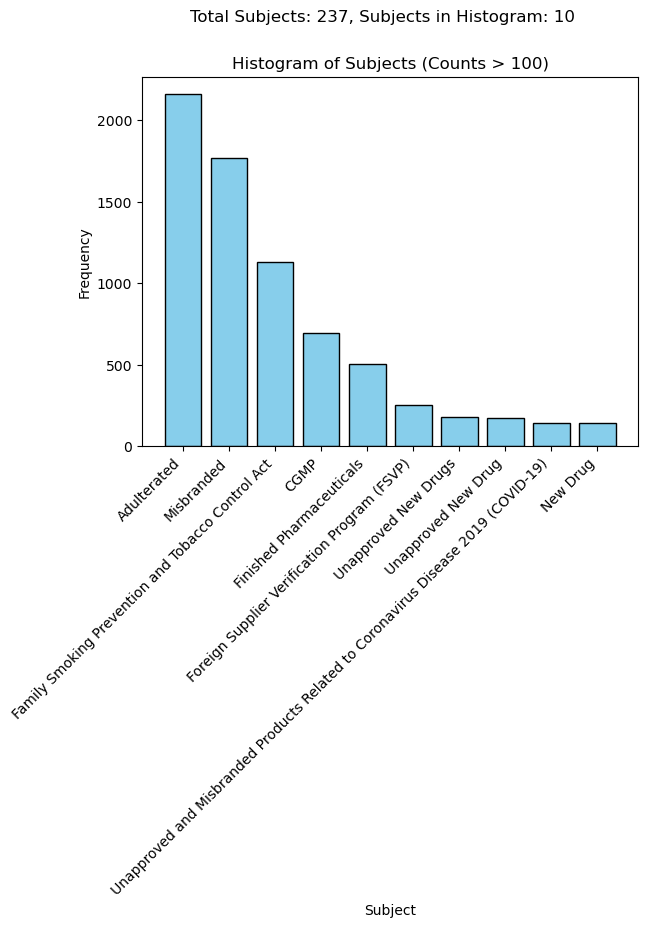

In [206]:
# Histogram of unique subjects
split_columns = df['Subject'].str.split('/')

# Flatten the list of split values
split_values = [item for sublist in split_columns for item in sublist]

# Count the occurrences of each value in the flattened list
subject_counts = pd.Series(split_values).value_counts()

# Convert the series to a dictionary
subject_counts_dict = subject_counts.to_dict()

# Filter the dictionary for counts greater than 50
subject_counts_filtered = {key: value for key, value in subject_counts_dict.items() if value > 100}

# Plotting the histogram with rotated x-axis labels
plt.bar(subject_counts_filtered.keys(), subject_counts_filtered.values(), color='skyblue', edgecolor='black')
plt.title('Histogram of Subjects (Counts > 100)')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees

# Add a subtitle with total number of subjects and subjects in the histogram
total_subjects = len(subject_counts)
subjects_in_histogram = len(subject_counts_filtered)
subtitle = f'Total Subjects: {total_subjects}, Subjects in Histogram: {subjects_in_histogram}'
plt.suptitle(subtitle, y=1.02, fontsize=12)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\sbous\AppData\Local\Temp\ipykernel_10140\1520539030.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45, ha='right')


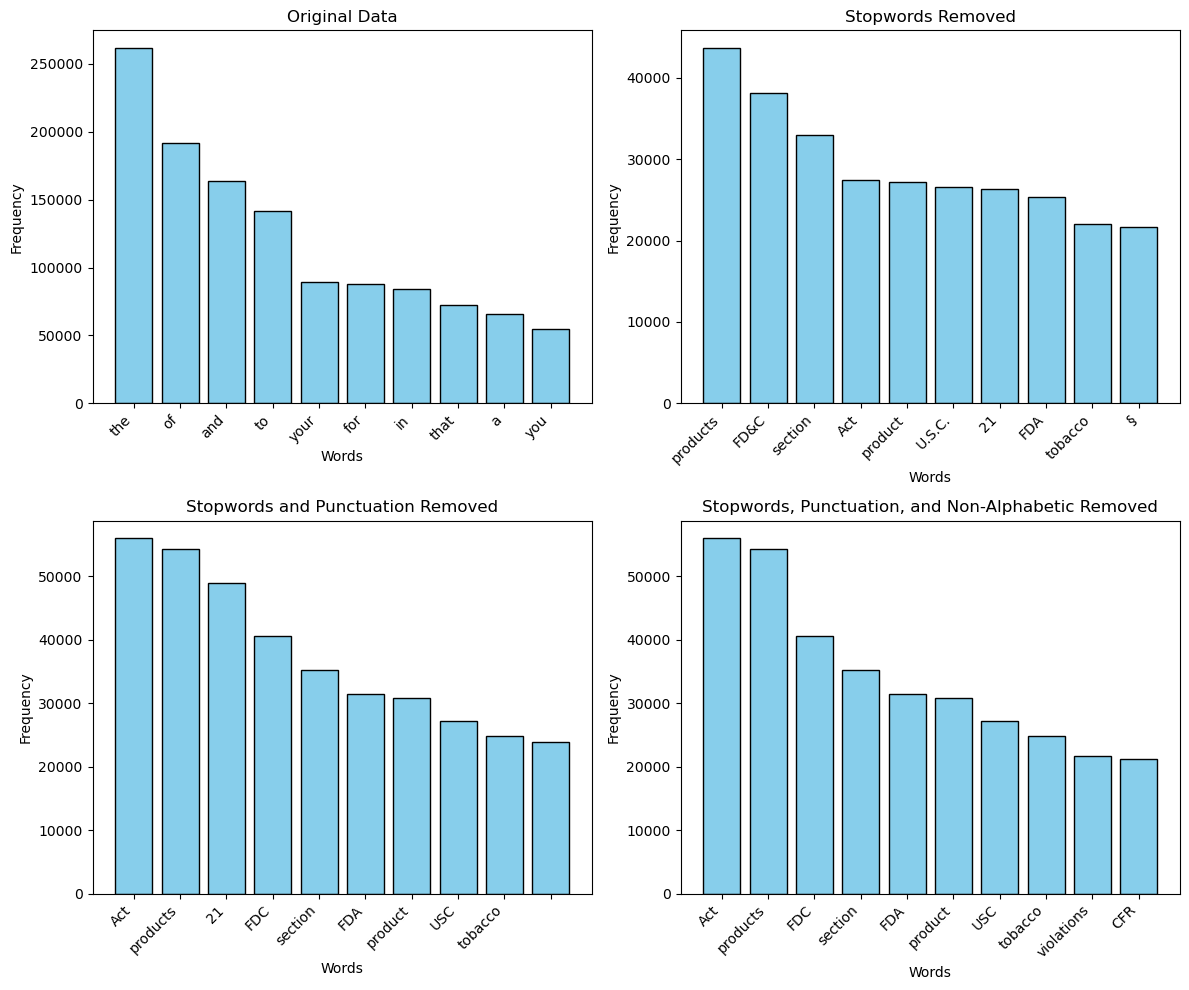

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string

# Function for preprocessing
def preprocess_document(document, stopwords_removed=False, punctuation_removed=False, non_alphabetic_removed=False):
    # Split the document into words
    words = document.split()
    
    # Remove stopwords if specified
    if stopwords_removed:
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word.lower() not in stop_words]
    
    # Remove punctuation if specified
    if punctuation_removed:
        words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    # Remove non-alphabetic characters if specified
    if non_alphabetic_removed:
        words = [word for word in words if word.isalpha()]
    
    return words

# Preprocess documents
df['Processed_Stopwords'] = df['Document'].apply(lambda x: preprocess_document(x, stopwords_removed=True))
df['Processed_Punctuation'] = df['Document'].apply(lambda x: preprocess_document(x, stopwords_removed=True, punctuation_removed=True))
df['Processed_NonAlphabetic'] = df['Document'].apply(lambda x: preprocess_document(x, stopwords_removed=True, punctuation_removed=True, non_alphabetic_removed=True))

# Function for plotting
def plot_top_words(ax, data, title):
    words = [word for sublist in data for word in sublist]
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    
    ax.bar(words, counts, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(words, rotation=45, ha='right')

# Create facets
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_top_words(axes[0, 0], df['Document'].apply(lambda x: x.split()), 'Original Data')
plot_top_words(axes[0, 1], df['Processed_Stopwords'], 'Stopwords Removed')
plot_top_words(axes[1, 0], df['Processed_Punctuation'], 'Stopwords and Punctuation Removed')
plot_top_words(axes[1, 1], df['Processed_NonAlphabetic'], 'Stopwords, Punctuation, and Non-Alphabetic Removed')

plt.tight_layout()
plt.show()

# Task 4: Machine Learning
## Named Entity Recognition (Code Section Violations)

### Logistic Regression Model

In [250]:
import pandas as pd
df = pd.read_csv("Final_Samples.csv")
#print(df.shape[0])
df = df.sample(frac=1)
#print(df.shape[0])
train_df = df.sample(frac=0.8, random_state=1)
X_train = train_df[['Mean Rowwise Embedding']]
Y_train = train_df['Y']
Y_train_label = train_df['Code']

test_df = df.drop(train_df.index)
X_test = test_df[['Mean Rowwise Embedding']]
Y_test = test_df['Y']
Y_test_label = test_df['Code']

#df.head(1)
#print(train_df.shape[0])
#print(test_df.shape[0])

In [ ]:
from sklearn.linear_model import LogisticRegression
import joblib

# Train the Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

# Save the model for future use
joblib.dump(log_reg_model, 'log_reg_model.joblib')
log_reg_model = joblib.load('log_reg_model.joblib')

Validation Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       779
           1       0.76      0.50      0.60       446

    accuracy                           0.76      1225
   macro avg       0.76      0.71      0.72      1225
weighted avg       0.76      0.76      0.75      1225

Cohen's Kappa: 0.4421


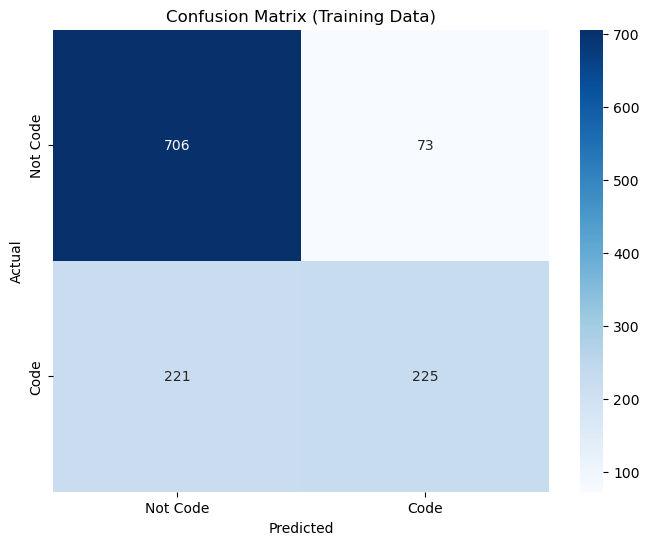

In [187]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = log_reg_model.predict(X_train)
accuracy = accuracy_score(Y_train, predictions)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(Y_train, predictions))

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_train, predictions)
kappa = cohen_kappa_score(Y_train, predictions)

# Display the results
print(f'Cohen\'s Kappa: {kappa:.4f}')
#print(f'Confusion Matrix:\n{conf_matrix}\n')

# Visualise the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Code', 'Code'], yticklabels=['Not Code', 'Code'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

Validation Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.81       190
           1       0.72      0.50      0.59       116

    accuracy                           0.74       306
   macro avg       0.73      0.69      0.70       306
weighted avg       0.74      0.74      0.73       306

Cohen's Kappa: 0.4089


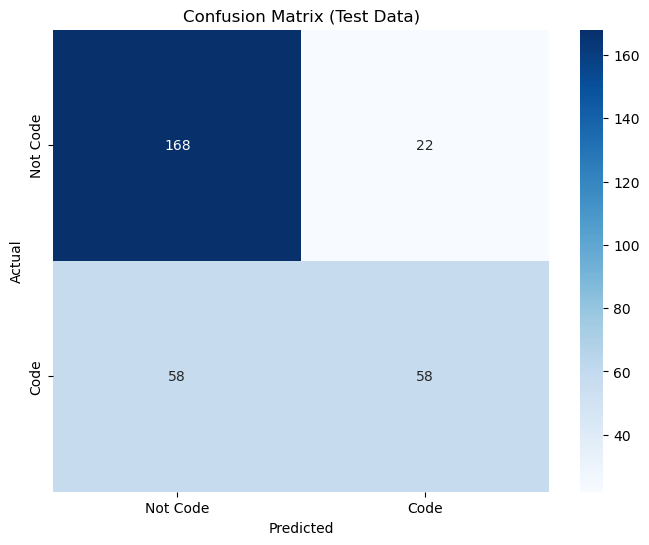

In [186]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = log_reg_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(Y_test, predictions))

conf_matrix = confusion_matrix(Y_test, predictions)
kappa = cohen_kappa_score(Y_test, predictions)

# Display the results
print(f'Cohen\'s Kappa: {kappa:.4f}')
#print(f'Confusion Matrix:\n{conf_matrix}\n')

# Visualise the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Code', 'Code'], yticklabels=['Not Code', 'Code'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

In [260]:
#evaluate the incorrectly identified ngrams
y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)
result_df = pd.DataFrame({
    'Y_test_label': Y_test_label,
    'Predicted_Class': y_pred,
    'Actual Class': Y_test,
    'Probability_Class_0': y_pred_prob[:, 0],
    'Probability_Class_1': y_pred_prob[:, 1]})

misclassified_df = result_df[result_df['Predicted_Class'] != result_df['Actual Class']]
misclassified_df.head(20)

,Y_test_label,Predicted_Class,Actual Class,Probability_Class_0,Probability_Class_1
1121,[21 U.S.C. 342(f) and 350b(a)].,0,1,0.543704,0.456296
464,"was pronounced, particularly in the",1,0,0.459004,0.540996
321,"from FDA, as described in",1,0,0.355038,0.644962
1209,(21 U.S.C. 384a),0,1,0.775849,0.224151
842,by the virus has been,1,0,0.432813,0.567187
1285,(21 U.S.C. § 387b(6)(A)).,0,1,0.671238,0.328762
635,Act (the Act) [21 U.S.C.,1,0,0.370249,0.629751
1231,[21 U.S.C. § 352(f)(1)],0,1,0.501815,0.498185
697,product produced (21 CFR 211.100,0,1,0.809624,0.190376
1479,section 201(g) of the FD&C Act,0,1,0.644614,0.355386


In [283]:
# Reprocess Incorrect Shorthand Tokens remove outer brackets
import numpy as np
import pandas as pd

text = ['21 U.S.C. 342(f) and 350b(a)', '21 U.S.C. 384a', '21 U.S.C. § 387b(6)(A).', '21 U.S.C. § 352(f)(1)',
        '21 U.S.C. § 387b(6)(A)', '21 CFR 211.68(a)', '21 U.S.C. § 387c(a)(7)(A)']

# Assuming model1 and log_reg_model are defined and loaded

embedding_list = []
predictions = []
probabilities = []

for sentence in text:
    tokens = sentence.split()
    for token in tokens:
        if token in model1.wv:
            embeddings = model1.wv[token]
            average_embedding = np.mean(embeddings, axis=0)
            embedding_list.append(average_embedding)

    if embedding_list:
        text_embedding = np.mean(embedding_list, axis=0).reshape(1, -1)
        # Use predict_proba instead of predict
        proba = log_reg_model.predict_proba(text_embedding)
        pred = log_reg_model.predict(text_embedding)
        predictions.append(pred[0])
        probabilities.append(proba[0])
    else:
        predictions.append(None)
        probabilities.append(None)

# Create a DataFrame
df = pd.DataFrame({
    'Original_Text': text,
    'Actual_Class': 1,  # You can replace None with your actual class labels
    'Predicted_Class': predictions,
    'Probability_Class_0': [proba[0] if proba is not None else None for proba in probabilities],
    'Probability_Class_1': [proba[1] if proba is not None else None for proba in probabilities]
})

display(df)

C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\

,Original_Text,Actual_Class,Predicted_Class,Probability_Class_0,Probability_Class_1
0,21 U.S.C. 342(f) and 350b(a),1,1,0.440656,0.559344
1,21 U.S.C. 384a,1,1,0.380253,0.619747
2,21 U.S.C. § 387b(6)(A).,1,1,0.332921,0.667079
3,21 U.S.C. § 352(f)(1),1,1,0.336470,0.663530
4,21 U.S.C. § 387b(6)(A),1,1,0.318754,0.681246
5,21 CFR 211.68(a),1,1,0.332477,0.667523
6,21 U.S.C. § 387c(a)(7)(A),1,1,0.320156,0.679844


In [284]:
# Reprocess Incorrect Shorthand Tokens remove all brackets
import numpy as np
import pandas as pd

text = ['21 U.S.C. 342f and 350ba', '21 U.S.C. 384a', '21 U.S.C. § 387b6A.', '21 U.S.C. § 352f1',
        '21 U.S.C. § 387b6A', '21 CFR 211.68a', '21 U.S.C. § 387ca7A']

# Assuming model1 and log_reg_model are defined and loaded

embedding_list = []
predictions = []
probabilities = []

for sentence in text:
    tokens = sentence.split()
    for token in tokens:
        if token in model1.wv:
            embeddings = model1.wv[token]
            average_embedding = np.mean(embeddings, axis=0)
            embedding_list.append(average_embedding)

    if embedding_list:
        text_embedding = np.mean(embedding_list, axis=0).reshape(1, -1)
        # Use predict_proba instead of predict
        proba = log_reg_model.predict_proba(text_embedding)
        pred = log_reg_model.predict(text_embedding)
        predictions.append(pred[0])
        probabilities.append(proba[0])
    else:
        predictions.append(None)
        probabilities.append(None)

# Create a DataFrame
df = pd.DataFrame({
    'Original_Text': text,
    'Actual_Class': 1,  # You can replace None with your actual class labels
    'Predicted_Class': predictions,
    'Probability_Class_0': [proba[0] if proba is not None else None for proba in probabilities],
    'Probability_Class_1': [proba[1] if proba is not None else None for proba in probabilities]
})

display(df)

C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\envs\py311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\sbous\anaconda3\

,Original_Text,Actual_Class,Predicted_Class,Probability_Class_0,Probability_Class_1
0,21 U.S.C. 342f and 350ba,1,1,0.347867,0.652133
1,21 U.S.C. 384a,1,1,0.315954,0.684046
2,21 U.S.C. § 387b6A.,1,1,0.289402,0.710598
3,21 U.S.C. § 352f1,1,1,0.277780,0.722220
4,21 U.S.C. § 387b6A,1,1,0.271269,0.728731
5,21 CFR 211.68a,1,1,0.271821,0.728179
6,21 U.S.C. § 387ca7A,1,1,0.268005,0.731995


# Old Code Sections

In [275]:
text = ['21 U.S.C. 342(f) and 350b(a)', '21 U.S.C. 384a', '21 U.S.C. § 387b(6)(A).', '21 U.S.C. § 352(f)(1)',
            '21 U.S.C. § 387b(6)(A)', '21 CFR 211.68(a)', '21 U.S.C. § 387c(a)(7)(A)']

#text = '[21 U.S.C. 342(f) and 350b(a)'
tokens = text.split()
embedding_list = []
for i in tokens:
    if i in model1.wv:
        embeddings = model1.wv[i]
        average_embedding = np.mean(embeddings, axis=0)
        embedding_list.append(average_embedding)
text_embedding = np.mean(embedding_list).reshape(1, -1)

pred = log_reg_model.predict(text_embedding)

print(pred)

AttributeError: 'list' object has no attribute 'split'

In [26]:
# Further preprocess data, stopword removal, tokenisation, lowercasing
# Leaving words unstemmed to keep granularity, and maintain entity distinction
# Not going to remove punctuation because of naming conventions with regulations (e.g. 21 CFR 820.1)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import string
#nltk.download('punkt')

# Custom ngram tokensiation function, e.g. particularly worried about how codes i.e. 21 CFR 820.1 will be treated
def tokenise_ngram(document, n):
    tokens = word_tokenize(document)
    n_grams = list(ngrams(tokens, n))
    n_grams = [' '.join(gram) for gram in n_grams]
    return n_grams


def preprocess_word2vec(document, n):
    # Tokenise the document
    tokens = tokenise_ngram(document, n)
    # Lowercase the tokens
    tokens_lower = [tok.lower() for tok in tokens]
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in tokens_lower if token not in stop_words]
    doc = 
    return tokens_no_stop

import time
start_time = time.time()
stripped['n_gram 1'] = stripped['Document'].apply(lambda x: preprocess_word2vec(x, 1))
print(f"n_gram 1 = {time.time() - start_time}")
stripped['n_gram 2'] = stripped['Document'].apply(lambda x: preprocess_word2vec(x, 2))
print(f"n_gram 2 = {time.time() - start_time}")
stripped['n_gram 3'] = stripped['Document'].apply(lambda x: preprocess_word2vec(x, 3))
print(f"n_gram 3 = {time.time() - start_time}")
stripped['n_gram 4'] = stripped['Document'].apply(lambda x: preprocess_word2vec(x, 4))
print(f"n_gram 4 = {time.time() - start_time}")
stripped['n_gram 5'] = stripped['Document'].apply(lambda x: preprocess_word2vec(x, 5))
print(f"n_gram 5 = {time.time() - start_time}")


stripped.to_csv("MA5851_A3_N_Grams.csv")

n_gram 1 = 36.84819436073303
n_gram 2 = 74.0625913143158
n_gram 3 = 112.2870090007782
n_gram 4 = 152.24583339691162
n_gram 5 = 190.20812010765076


In [2]:
import pandas as pd
ngrams_df = pd.read_csv("MA5851_A3_N_Grams.csv")
ngramasdf = ngrams_df.at[4, 'n_gram 1']
print(ngramasdf)

['recipient', ':', 'recipient', 'name', 'mr.', 'umang', 'vohra', 'recipient', 'title', 'managing', 'director', 'global', 'ceo', 'cipla', 'limited', 'cipla', 'house', ',', 'peninsula', 'business', 'park', 'mumbai', 'ganpatrao', 'kadam', 'marg', 'lower', 'parel', ',', 'mumbai', '400013', 'maharashtra', 'india', 'umang.vohra', '@', 'cipla.com', 'issuing', 'office', ':', 'center', 'drug', 'evaluation', 'research', '|', 'cder', 'united', 'states', 'warning', 'letter', '320-24-11', 'november', '17', ',', '2023', 'dear', 'mr.', 'vohra', ':', 'u.s.', 'food', 'drug', 'administration', '(', 'fda', ')', 'inspected', 'drug', 'manufacturing', 'facility', ',', 'cipla', 'limited', ',', 'fei', '3008581988', ',', 'plot', '.', '9', '&', '10', ',', 'pharma', 'zone', 'phase', 'ii', ',', 'sector', 'iii', ',', 'indore', 'special', 'economic', 'zone', ',', 'pithampur', ',', 'district', 'dhar', ',', 'madhya', 'pradesh', '454775', ',', 'india', ',', 'february', '6', 'february', '17', ',', '2023', '.', 'warning

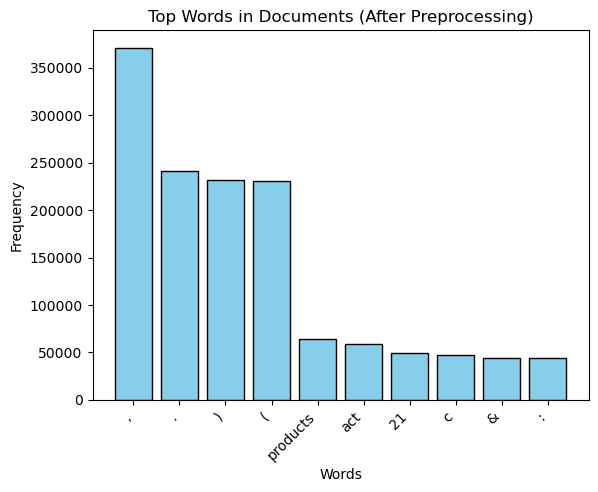

In [213]:
# Most common words in corpus
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords

def tokenise_ngram(document, n):
    tokens = word_tokenize(document)
    n_grams = list(ngrams(tokens, n))
    n_grams = [' '.join(gram) for gram in n_grams]
    return n_grams

def preprocess_word2vec(document, n):
    # Tokenize the document
    tokens = tokenise_ngram(document, n)
    # Lowercase the tokens
    tokens_lower = [tok.lower() for tok in tokens]
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in tokens_lower if token not in stop_words]
    return tokens_no_stop

# Apply preprocessing to each document
df['Processed Document'] = df['Document'].apply(lambda x: preprocess_word2vec(x, n=1))

# Calculate word counts for each processed document
all_tokens = [token for sublist in df['Processed Document'] for token in sublist]
word_counts = Counter(all_tokens)

# Extract top words and their counts
common_words = word_counts.most_common(10)  # Adjust the number of words to display
words, counts = zip(*common_words)

# Plotting the bar chart of top words
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Top Words in Documents (After Preprocessing)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [55]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
corpus = pd.read_csv("MA5851_A3_Stripped_Corpus.csv")

tok_corpus = [word_tokenize(doc.lower()) for doc in corpus['Document']]

# Train Word2Vec model
model = Word2Vec(sentences=tok_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Document Embeddings test
# document_embeddings = [model.wv[doc] for doc in tok_corpus]
# Save the model for future use
model.save("word2vec_model.model")